<b> Problem Statement </b>

Titanic: Machine Learning from Disaster


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

<b>Download the dataset from: </b>

https://www.kaggle.com/c/titanic/data

<b> Importing necessary libraries </b>

In [661]:
import numpy as np                                    #Importing numpy library as 'np'.
import seaborn as sns                                 #Importing seaborn library as 'sns'.
import pandas as pd                                   #Importing pandas library as 'pd'.
from matplotlib import pyplot as plt                  #Importing matplotlib.pyplot as'plt'.
import re                                             #Importing Regular Expressions.

#Setting the backend of matplotlib to the 'inline' backend.
%matplotlib inline                                    
from matplotlib import style

#Importing libraries for algorithms.
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

<b> Reading data from the system </b>

In [662]:
#Importing 'csv' file as dataframe using 'pd.read_csv()' function.
Test = pd.read_csv("test.csv")
Train = pd.read_csv("train.csv")

<b> Returning basic information about the dataframes </b>

In [663]:
#Returning basic information about the created dataframes using '.info()' function.
Test.info()
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

In [664]:
#Retruning basic statistical data about the dataframe 'Test'.
Test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [665]:
#Retruning basic statistical data about the dataframe 'Train'.
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [666]:
#Returning first 9 tuples from the dataframe using '.head()' function.
Train.head(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [667]:
#Returning total missing values in the dataframe 'Train'
Total_missing = Train.isnull().sum().sort_values(ascending=False)
Percent1 = Train.isnull().sum()/Train.isnull().count()*100
Percent2 = (round(Percent1, 1)).sort_values(ascending=False)
Data_missing = pd.concat([Total_missing, Percent2], axis=1, keys=['Total', '%'])

#Returning the first 13 tuples using '.head()' function.
Data_missing.head(12)


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


<b> Data Visualisation </b>

<b> Determinng the attributes which influence the 'Survival' of a person </b>

<b>Embarked, Pclass and Sex </b>

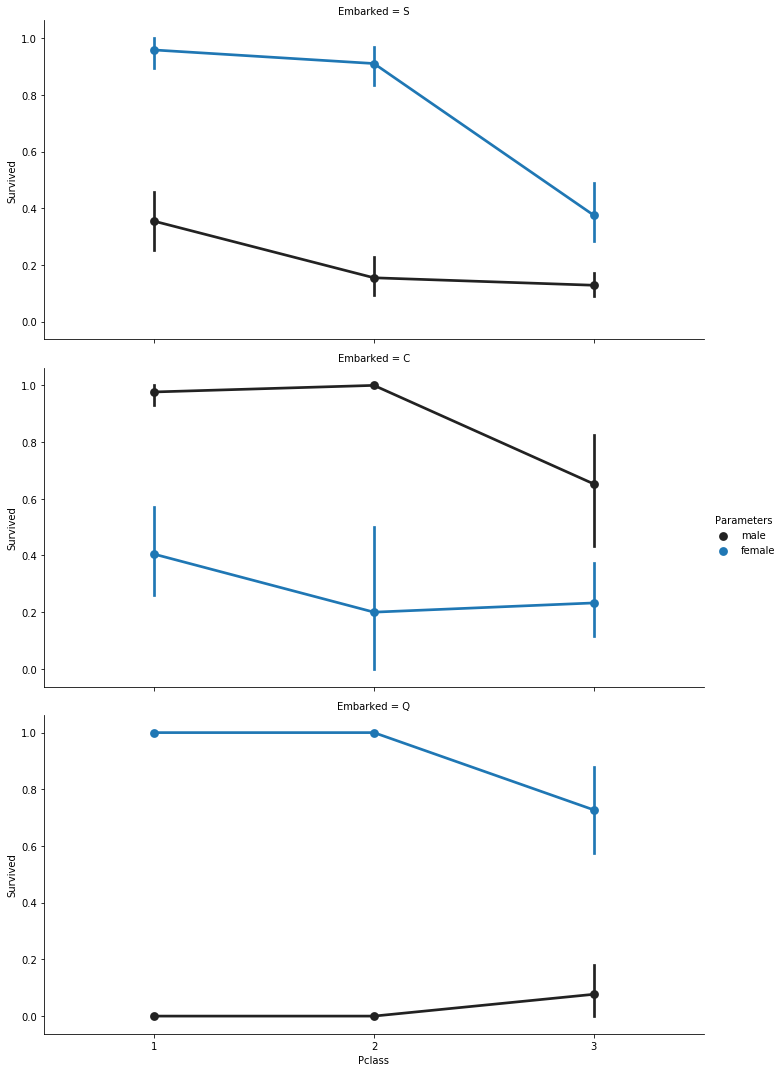

In [668]:
#Returning 'FacetGrid' plots to evaluate their relationships.
#Embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton represented as C,Q and S respecitvely.
FacetGrid = sns.FacetGrid(Train, row='Embarked', height=5, aspect=2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )

#Adding legend to showcase the parameters.
FacetGrid.add_legend(title='Parameters')

<b> Women on port Q and on port S have a higher chance of survival but if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S. </b>

 <b> Age and Sex </b>

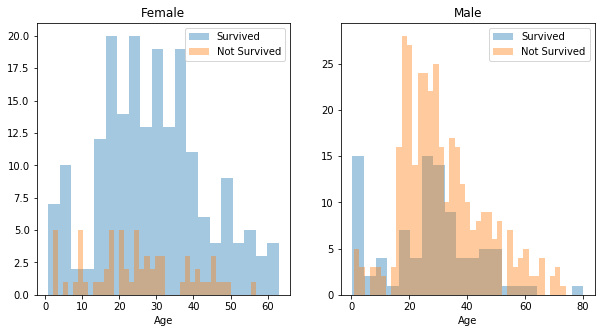

In [669]:
#Survived = 'Survived'
#Not_survived = 'Not Survived'
#Returning plots using seaborn library.
Figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))

#Returning required parameters.
Women = Train[Train['Sex']=='female']
Men = Train[Train['Sex']=='male']

#Returning plot,dropping the 'Nan' values and labelling plots.
ax = sns.distplot(Women[Women['Survived']==1].Age.dropna(), bins=20, label = Survived, ax = axes[0], kde =False)
ax = sns.distplot(Women[Women['Survived']==0].Age.dropna(), bins=40, label = Not_survived, ax = axes[0], kde =False)

#Adding legend to showcase the parameters.
ax.legend()

#Returning plot dropping the 'Nan' values and labelling plots.
ax.set_title('Female')
ax = sns.distplot(Men[Men['Survived']==1].Age.dropna(), bins=20, label = Survived, ax = axes[1], kde = False)
ax = sns.distplot(Men[Men['Survived']==0].Age.dropna(), bins=40, label = Not_survived, ax = axes[1], kde = False)

#Adding legend to showcase the parameters.
ax.legend()
_ = ax.set_title('Male')

<b> The chances of a female surviving are more than a male. </b>

<b> Pclass and Survived </b>

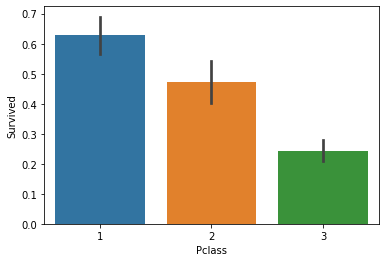

In [670]:
#Returning barplot of 'Pclass' vs 'Survived'.
sns.barplot(x='Pclass', y='Survived', data=Train)

<b> The chances of a Class-1 person surviving are more than those of Class-2 and Class-3. </b>

<b> SibSp and Parch </b>

In [671]:
#Creating variable 'Data'.
Data = [Train, Test]

#Traversing through 'Data'.
for x in Data:
    x['Relatives'] = x['SibSp'] + x['Parch']
    x.loc[x['Relatives'] > 0, 'Surrounded'] = 0
    x.loc[x['Relatives'] == 0, 'Surrounded'] = 1
    
    #Setting datatype as 'int' to make data homogeneous.
    x['Surrounded'] = x['Surrounded'].astype(int)
    
#Returning number of unique values.
Train['Surrounded'].value_counts()

1    537
0    354
Name: Surrounded, dtype: int64

C:\Users\Helenasec\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


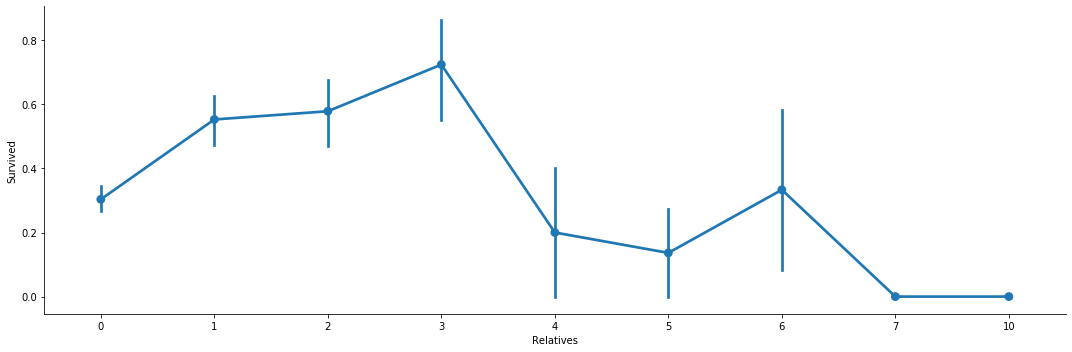

In [672]:
#Returning factorplot for 'Relatives' vs 'Survived'.
xy = sns.factorplot('Relatives','Survived', data=Train, aspect = 3)

<b> The chances of survival with 1 to 3 realitves are high, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives). </b>

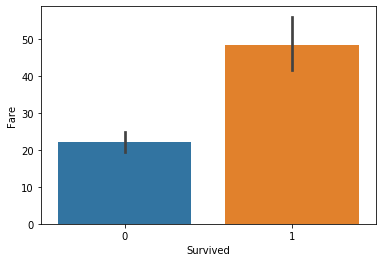

In [673]:
#Returning barplot of 'Survived' vs 'Fare'.
sns.barplot(Train['Survived'], Train['Fare'])

<b> The chances of person paying more fare is more than the person paying less fare. </b>

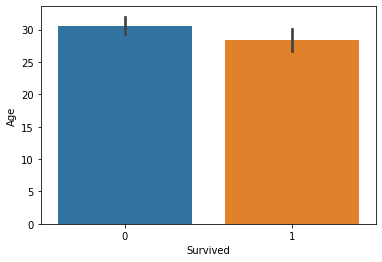

In [674]:
#Returning barplot of 'Survived' vs 'Age'.
sns.barplot(Train['Survived'], Train['Age'])

<b> The attribute Age does not really influence Survival chances. </b>

<b>Data Preprocessing</b>

Handling missing values and dropping columns which are not needed.

In [675]:
#Dropping column 'PassengerId' since it does not influence 'Survival' of a person.
Train = Train.drop(['PassengerId'], axis=1)

#Dropping column 'Ticket' since it does not influence 'Survival' of a person and is difficult to make homogeneous.
Train = Train.drop(['Ticket'], axis=1)
Test = Test.drop(['Ticket'], axis=1)

Although 'Cabin' does not seem to affect a person's 'Survival' but the 'Cabin' consists of the 'Deck' number so we will extract that value and create a new attribute.

<b> Cabin </b>

In [676]:
#Defining 'Deck'
Deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

#Creating variable 'Data'.
Data = [Train, Test]

#Traversing through 'Data'.
for x in data:
    x['Cabin'] = x['Cabin'].fillna("U0")
    x['Deck'] = x['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    x['Deck'] = x['Deck'].map(deck)
    #Substituting 'NA' values with zero.
    x['Deck'] = x['Deck'].fillna(0)
    #Converting 'Deck' to 'int'.
    x['Deck'] = x['Deck'].astype(int)
    
#Dropping 'Cabin'.
Train = Train.drop(['Cabin'], axis=1)
Test = Test.drop(['Cabin'], axis=1)

<b> Age </b>

In [677]:
#Creating variable 'Data'.
Data = [Train, Test]

#Traversing through 'Data'.
for x in Data:
    #Computing Mean and Std.
    Mean = Train["Age"].mean()
    Std = Test["Age"].std()
    #Summing Null values.
    Is_null = x["Age"].isnull().sum()
    
    #Computing random numbers between the Mean, Std and Is_null.
    Age_rand = np.random.randint(Mean - Std, Mean + Std, size = Is_null)
    
    #Substituing 'NaN' values in 'Age' with 'Age_rand'.
    Age_new = x["Age"].copy()
    Age_new[np.isnan(Age_new)] = Age_rand
    x["Age"] = Age_new
    #Converting 'Age' to 'int'.
    x["Age"] = Train["Age"].astype(int)
    
#Returning number of null values.
Train["Age"].isnull().sum()

0

<b> Embarked </b>

In [678]:
#Evaluating the most common value to fill the 2 missing value.
Train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [679]:
#Defining common value.
Common_value = 'S'

#Creating variable 'Data'.
Data = [Train, Test]

#Traversing through 'Data'.
for x in Data:
    #Substituing 'NA' values with 
    x['Embarked'] = x['Embarked'].fillna(Common_value)

In [680]:

#Creating variable 'Data'.
Data = [Train, Test]

#Traversing through 'Data'.
for x in Data:
    #Substituing 'NA' values with 
    x['Sex'] = x['Sex'].fillna('male')
Train['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

<b> Making data homogenous </b>

<b> Fare </b>

In [681]:
#Creating variable 'Data'.
Data = [Train, Test]

#Traversing through 'Data'.
for x in Data:
    #Subsituting missing valyes with 0.
    x['Fare'] = x['Fare'].fillna(0)
    #Converting 'Fare' to 'int'.
    x['Fare'] = x['Fare'].astype(int)

<b> Name </b>

In [682]:
#Creating variable 'Data'.
Data = [Train, Test]

#Declaring variable 'Titles'.
Titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

#Traversing through 'Data'.
for x in Data:
    #Extracting titles.
    x['Title'] = x.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    #Replacing 'Titles' with a more common title or Rare.
    x['Title'] = x['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    x['Title'] = x['Title'].replace('Mlle', 'Miss')
    x['Title'] = x['Title'].replace('Ms', 'Miss')
    x['Title'] = x['Title'].replace('Mme', 'Mrs')
    
    #Converting 'Titles' into numbers.
    x['Title'] = x['Title'].map(titles)
    
    # Substituting 'NaN' with 0.
    x['Title'] = x['Title'].fillna(0)

#Dropping column 'Name'.
Train = Train.drop(['Name'], axis=1)
Test = Test.drop(['Name'], axis=1)

<b> Gender </b>

In [683]:
#Declaring variable 'Gender'.
Gender = {"male": 0, "female": 1}

#Creating variable 'Data'.
Data = [Train, Test]

#Traversing through 'Data'.
for x in Data:
    x['Sex'] = x['Sex'].map(Gender)

<b> Embarked </b>

In [684]:
#Declaring variable 'Ports'.
Ports = {"S": 0, "C": 1, "Q": 2}

#Creating variable 'Data'.
Data = [Train, Test]

#Traversing through 'Data'.
for x in Data:
    x['Embarked'] = x['Embarked'].map(Ports)

<b> Grouping Data </b>

<b> Age </b>

In [685]:
#Creating variable 'Data'.
Data = [Train, Test]

#Traversing through 'Data'.
for x in Data:
    #Converting 'Age' to 'int'.
    x['Age'] = x['Age'].astype(int)
    x.loc[ x['Age'] <= 11, 'Age'] = 0
    x.loc[(x['Age'] > 11) & (x['Age'] <= 18), 'Age'] = 1
    x.loc[(x['Age'] > 18) & (x['Age'] <= 22), 'Age'] = 2
    x.loc[(x['Age'] > 22) & (x['Age'] <= 27), 'Age'] = 3
    x.loc[(x['Age'] > 27) & (x['Age'] <= 33), 'Age'] = 4
    x.loc[(x['Age'] > 33) & (x['Age'] <= 40), 'Age'] = 5
    x.loc[(x['Age'] > 40) & (x['Age'] <= 66), 'Age'] = 6
    x.loc[ x['Age'] > 66, 'Age'] = 6
    
#Returning count.
Train['Age'].value_counts()

4    178
6    156
5    142
3    142
2    112
1     93
0     68
Name: Age, dtype: int64

<b> Fare </b>

In [686]:
Train.head(13)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Surrounded,Title
0,0,3,0,2,1,0,7,0,1,0,1
1,1,1,1,5,1,0,71,1,1,0,3
2,1,3,1,3,0,0,7,0,0,1,2
3,1,1,1,5,1,0,53,0,1,0,3
4,0,3,0,5,0,0,8,0,0,1,1
5,0,3,0,4,0,0,8,2,0,1,1
6,0,1,0,6,0,0,51,0,0,1,1
7,0,3,0,0,3,1,21,0,4,0,4
8,1,3,1,3,0,2,11,0,2,0,3
9,1,2,1,1,1,0,30,1,1,0,3


In [687]:
#Creating variable 'Data'.
Data = [Train, Test]

#Traversing through 'Data'.
for x in Data:
    x.loc[ x['Fare'] <= 7.91, 'Fare'] = 0
    x.loc[(x['Fare'] > 7.91) & (x['Fare'] <= 14.454), 'Fare'] = 1
    x.loc[(x['Fare'] > 14.454) & (x['Fare'] <= 31), 'Fare']   = 2
    x.loc[(x['Fare'] > 31) & (x['Fare'] <= 99), 'Fare']   = 3
    x.loc[(x['Fare'] > 99) & (x['Fare'] <= 250), 'Fare']   = 4
    x.loc[ x['Fare'] > 250, 'Fare'] = 5
    x['Fare'] = x['Fare'].astype(int)

<b> Adding new features </b>

In [688]:
#Traversing through 'Data'.
for x in Data:
    #Declaring new attribute 'Fare_per_head'
    x['Fare_per_head'] = x['Fare']/(x['Relatives']+1)
    x['Fare_per_head'] = x['Fare_per_head'].astype(int)

#Returning 13 tuples from the top.
Train.head(13)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Surrounded,Title,Fare_per_head
0,0,3,0,2,1,0,0,0,1,0,1,0
1,1,1,1,5,1,0,3,1,1,0,3,1
2,1,3,1,3,0,0,0,0,0,1,2,0
3,1,1,1,5,1,0,3,0,1,0,3,1
4,0,3,0,5,0,0,1,0,0,1,1,1
5,0,3,0,4,0,0,1,2,0,1,1,1
6,0,1,0,6,0,0,3,0,0,1,1,3
7,0,3,0,0,3,1,2,0,4,0,4,0
8,1,3,1,3,0,2,1,0,2,0,3,0
9,1,2,1,1,1,0,2,1,1,0,3,1


<b> Age times Class </b>

In [689]:
#Creating variable 'Data'.
Data = [Train, Test]

#Traversing through 'Data'.
for x in data:
    x['Age_Pclass']= x['Age']* x['Pclass']

<b> Building Models </b>

In [690]:
XTrain = Train.drop("Survived", axis=1)
YTrain = Train["Survived"]
XTest  = Test.drop("PassengerId", axis=1).copy()

<b> 1. Stochastic Gradient Descent </b>

In [691]:
#Training using 'SGD'.
Sgd = linear_model.SGDClassifier(max_iter=5, tol=None)

#Adjusting weights of the data.
Sgd.fit(XTrain, YTrain)

#Returning a label for each object using .'predict()' function.
YPred = Sgd.predict(XTest)

#Calculating score using '.score()' function.
Sgd.score(XTrain, YTrain)

#Rouding up the score.
Acc_sgd = round(Sgd.score(XTrain, YTrain) * 100, 2)

<b> 2. Logistic Regression </b>

In [692]:
#Training using 'LR'.
Lr = LogisticRegression()

#Adjusting weights of the data.
Lr.fit(XTrain, YTrain)

#Returning a label for each object using .'predict()' function.
YPred = Lr.predict(XTest)

#Rouding up the score.
Acc_lr = round(Lr.score(XTrain, YTrain) * 100, 2)

<b> 3. Random Forest </b>

In [693]:
#Training using 'RF'.
Rf = RandomForestClassifier(n_estimators=100)

#Adjusting weights of the data.
Rf.fit(XTrain, YTrain)

#Returning a label for each object using .'predict()' function.
YPrediction = Rf.predict(XTest)

#Calculating score using '.score()' function.
Rf.score(XTrain, YTrain)

#Rouding up the score.
Acc_rf = round(Rf.score(XTrain, YTrain) * 100, 2)

<b> 4. Gaussian Naive Bayes </b>

In [694]:
#Training using 'GNB'.
Gaussian = GaussianNB() 

#Adjusting weights of the data.
Gaussian.fit(XTrain, YTrain)  

#Returning a label for each object using .'predict()' function.
YPred = Gaussian.predict(XTest) 

#Rouding up the score.
Acc_gaussian = round(Gaussian.score(XTrain, YTrain) * 100, 2)

<b> 5. Decision Tree </b>

In [695]:
#Training using 'DT'.
Dt = DecisionTreeClassifier() 

#Adjusting weights of the data.
Dt.fit(XTrain, YTrain)  

#Returning a label for each object using .'predict()' function.
YPred = Dt.predict(XTest)  

#Rouding up the score.
Acc_dt = round(Dt.score(XTrain, YTrain) * 100, 2)

<b> Selecting the best model </b>

In [696]:
#Creating dataframe 'Models' to select best model.
Models = pd.DataFrame({
    'Model': ['Stochastic Gradient Decent','Logistic Regression','Random Forest',
              'Gaussian Naive Bayes','Decision Tree'],
    'Score': [Acc_sgd,Acc_lr,Acc_rf,Acc_gaussian,Acc_dt]})

#Sorting 'Models' in descending order.
Models_df = Models.sort_values(by='Score', ascending=False)
Models_df = Models_df.set_index('Score')
Models_df.head(13)

,Model
Score,
91.13,Random Forest
91.13,Decision Tree
81.59,Logistic Regression
78.23,Gaussian Naive Bayes
73.29,Stochastic Gradient Decent


<b> K-Fold Cross Validation on RF model </b>

In [697]:
#Returning the 'Scores','Mean' and 'Standard Deviaition'
Rf = RandomForestClassifier(n_estimators=100)
Scores = cross_val_score(Rf, XTrain, YTrain, cv=10, scoring = "accuracy")
print("Scores:", Scores)
print("Mean:", Scores.mean())
print("Standard Deviation:", Scores.std())

Scores: [0.73333333 0.80898876 0.76404494 0.84269663 0.85393258 0.85393258
 0.86516854 0.78651685 0.84269663 0.83146067]
Mean: 0.8182771535580524
Standard Deviation: 0.04166464246229857


In [698]:
print("The average accuracy of our RF model is: 0.8205118601747815")

The average accuracy of our RF model is: 0.8205118601747815


<b> Clearly RANDOM FOREST is the best choice as a model. </b>

In [712]:
#Returning dataframe 'Importance' in descending order according to their importance.
Importance = pd.DataFrame({'feature':XTrain.columns,'Importance':np.round(Rf.feature_importances_,3)})
Importance = Importance.sort_values('Importance',ascending=False).set_index('feature')
Importance.head(13)

,Importance
feature,
Title,0.274
Sex,0.216
Pclass,0.119
Age,0.095
Fare,0.074
Relatives,0.072
Fare_per_head,0.044
SibSp,0.039
Embarked,0.034


In [ ]:
#returning plot featuring 'Importance'
Importance.plot.bar()

In [ ]:
#Dropping attributes which don't influence 'Survival' of a person.
Train  = Train.drop("Surrounded", axis=1)
Test  = Test.drop("Surrounded", axis=1)

Train  = Train.drop("Parch", axis=1)
Test  = Test.drop("Parch", axis=1)

<b> Training Random Forest further </b>

In [700]:
#Improving accuracy.
Rf = RandomForestClassifier(n_estimators=100, oob_score = True)

#Adjusting weights of the data.
Rf.fit(XTrain, YTrain)

#Returning a label for each object using .'predict()' function.
Y_prediction = Rf.predict(XTest)

#Rouding up the score.
Rf.score(XTrain, YTrain)

Acc_Rf = round(Rf.score(XTrain, YTrain) * 100, 2)
print(round(Acc_Rf,2,), "%")

91.13 %


In [701]:
#Returning 'out-of-bag' error estimating and removing the need for a set aside test set.
#Generalization accuracy using 'OOB'
print("The OOB Score is:", round(Rf.oob_score_, 4)*100, "%")

The OOB Score is: 82.27 %


<b> Testing new parameters </b>

In [702]:
Rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, min_samples_split = 10,n_estimators=100, 
                                       max_features='auto',oob_score=True,random_state=1, n_jobs=-1)

#Adjusting weights of the data.
Rf.fit(XTrain, YTrain)

#Returning a label for each object using .'predict()' function.
YPrediction = Rf.predict(XTest)

#Rouding up the score.
Rf.score(XTrain, YTrain)

#Returning 'out-of-bag' error estimating and removing the need for a set aside test set.
print("The OOB Score is:", round(Rf.oob_score_, 4)*100, "%")

The OOB Score is: 83.73 %


<b> Confusion Matrix </b>

In [703]:
#Returning a confusion matrix.
Predictions = cross_val_predict(Rf, XTrain, YTrain, cv=3)
print("The confusion matrix is:")
confusion_matrix(YTrain, Predictions)

#First row indicates 'not-survived' and second row indicates 'survived' cases.

The confusion matrix is:


array([[490,  59],
       [ 90, 252]], dtype=int64)

In [704]:
#Returning 'Precision','Recall' and 'F1-Score' calculated from the confusion matrix.
print("The Precision is:\n", precision_score(YTrain, Predictions))
print("The Recall is:\n",recall_score(YTrain, Predictions))
print("The F1 Score is\n:",f1_score(YTrain, Predictions))

The Precision is:
 0.8102893890675241
The Recall is:
 0.7368421052631579
The F1 Score is
: 0.7718223583460949


<b> Precision Recall Curve </b>

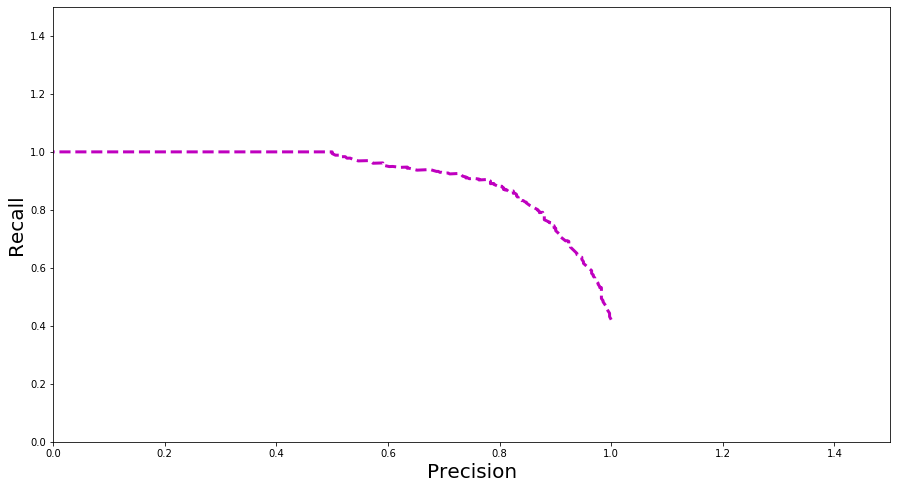

In [705]:
#Creatinng function 'Precision_vs_Recall'.
def Precision_vs_Recall(Precision, Recall):
    plt.plot(Recall, Precision, "m--", linewidth=3)
    plt.ylabel("Recall", fontsize=20)
    plt.xlabel("Precision", fontsize=20)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(15, 8))
Precision_vs_Recall(Precision, Recall)
plt.show()

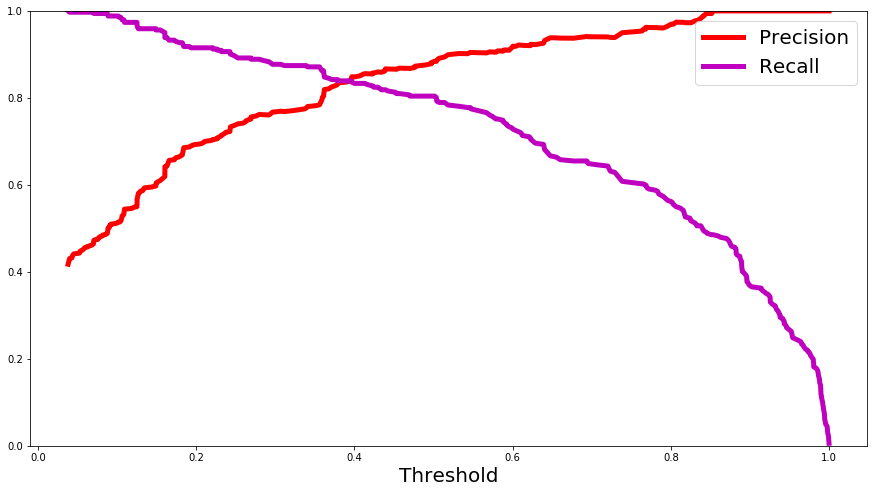

In [706]:
YScores = Rf.predict_proba(XTrain)
YScores = YScores[:,1]

Precision, Recall, Threshold = precision_recall_curve(YTrain, YScores)

#Creatinng function 'Precision_vs_Recall'.
def Precision_and_Recall(Precision, Recall, Threshold):
    plt.plot(Threshold, Precision[:-1], "r-", label="Precision", linewidth=5)
    plt.plot(Threshold, Recall[:-1], "m", label="Recall", linewidth=5)
    plt.xlabel("Threshold", fontsize=20)
    plt.legend(loc="upper right", fontsize=20)
    plt.ylim([0, 1])

plt.figure(figsize=(15, 8))
Precision_and_Recall(Precision, Recall, Threshold)
plt.show()

<b> ROC AUC Curve </b>

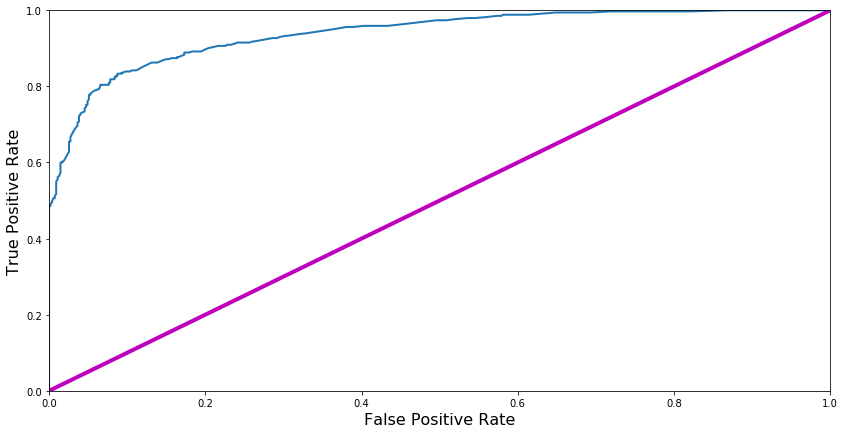

In [707]:
FPR, TPR, Thresholds = roc_curve(YTrain, YScores)
#Plotting them against each other.
#Creatinng function 'Precision_vs_Recall'.
def Plot_Roc_Curve(FPR, TPR, label=None):
    plt.plot(FPR,TPR, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'm', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(14, 7))
Plot_Roc_Curve(FPR, TPR)
plt.show()

In [708]:
#Returning thr ROC-AUC-Score.
#Returning the area under the curve for above plot.
R_A_score = roc_auc_score(YTrain, YScores)
print("The ROC-AUC-Score is:\n", R_A_score)

The ROC-AUC-Score is:
 0.9385592091948146


In [709]:
Train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Surrounded,Title,Fare_per_head
0,0,3,0,2,1,0,0,0,1,0,1,0
1,1,1,1,5,1,0,3,1,1,0,3,1
2,1,3,1,3,0,0,0,0,0,1,2,0
3,1,1,1,5,1,0,3,0,1,0,3,1
4,0,3,0,5,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0,0,1,5,1
887,1,1,1,2,0,0,2,0,0,1,2,2
888,0,3,1,4,1,2,2,0,3,0,2,0
889,1,1,0,3,0,0,2,1,0,1,1,2


In [710]:
print("Thank You!")

Thank You!
